__What Dictates the Rating of a Film?__

The dataset we are using for this project are from IMDb, which show data collected on film and tv staff, ratings, runtime, and various other factors in relation to movies and tv shows listed in IMDb. Movie and tv titles are represented by codes that are referred to across multiple datasets that display more information on these movies/tv shows.


Our project is guided by the following research questions:

1. _Do the adult title, release year, runtime, and number of directors of a film affect its average rating?_
2. _Does the genre of a film affect its average rating?_
3. _Does the number of votes a film receives affect the average rating of the film? Additionally, what other variables inform how many votes a film receives?_

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import math

# Testing datasets:
ratings_test = pd.read_csv(io.StringIO("""
tconst	averageRating	numVotes
tt0000001	0.0	0
tt0000002	10.0	272
tt0000003	6.5	1968
tt0000004	5.4	178
tt0000005	6.2	2731
tt0000006	5.0	183
tt0000007	5.4	848
tt0000008	5.4	2174
tt0000009	5.3	208
tt0000010	6.8	7461
"""), sep="\t")
# Testing set has the 10 movies for testing. Each has a rating and number of votes, with a range of values.

crew_test = pd.read_csv(io.StringIO("""
tconst	directors	writers
tt0000001	nm0005690,nm0721526,nm0721526	\\N
tt0000002	nm0721526	\\N
tt0000003	nm0721526,nm0721526	\\N
tt0000004	nm0721526	\\N
tt0000005	nm0005690,nm0721526,nm0721526,nm0721526	\\N
tt0000006	nm0005690	\\N
tt0000017	nm0005690,nm0374658	\\N
tt0000018	nm0005690	\\N
tt0000019	nm0085156	nm0085156
"""), sep="\t")
# Testing set has 10 movies. Some movies have 1 director, other movies have two or more.
# Some movies do not appear in our movies test file.

movies_test = pd.read_csv(io.StringIO("""
tconst	titleType	primaryTitle	originalTitle	isAdult	startYear	endYear	runtimeMinutes	genres
tt0000001	movie	Carmencita	Carmencita	0	1894	\\N	60	Documentary,Short
tt0000002	movie	Le clown et ses chiens	Le clown et ses chiens	0	1892	\\N	5	Animation,Short
tt0000003	movie	Pauvre Pierrot	Pauvre Pierrot	0	1892	\\N	100	Animation,Comedy,Romance
tt0000004	short	Un bon bock	Un bon bock	0	1892	\\N	32	Animation,Short
tt0000005	movie	Blacksmith Scene	Blacksmith Scene	1	1893	\\N	120	Comedy,Short
tt0000006	movie	Chinese Opium Den	Chinese Opium Den	0	1894	\\N	40	Short
tt0000007	movie	Corbett and Courtney Before the Kinetograph	Corbett and Courtney Before the Kinetograph	0	1894	\\N	82	Short,Sport
tt0000008	movie	Edison Kinetoscopic Record of a Sneeze	Edison Kinetoscopic Record of a Sneeze	0	1894	\\N	3	Documentary,Short
tt0000009	movie	Miss Jerry	Miss Jerry	1	1894	\\N	45	Romance
tt0000010	movie	Leaving the Factory	La sortie de l'usine Lumière à Lyon	0	1895	\\N 27	Documentary,Short
"""), sep="\t")
# Movies 8 and 9 don't have associated staff.
# Movie 4 is not a movie.
# Runtime is varying, some have multiple genres listed some only have one. There is a range of genres in this column.
# Start year also varies.

# Read in each dataset as a csv file
ratings_df = pd.read_csv("/Users/karishmaraj/Downloads/title.ratings.tsv.gz", sep="\t")
staff_df = pd.read_csv("/Users/karishmaraj/Downloads/name.basics.tsv.gz", sep="\t")
movies_df = pd.read_csv("/Users/karishmaraj/Downloads/title.basics.tsv.gz", sep="\t", low_memory=False) # low_memory=False because of the large data size.
staff_roles_df = pd.read_csv("/Users/karishmaraj/Downloads/title.principals.tsv.gz", sep="\t")
crew_df = pd.read_csv("/Users/karishmaraj/Downloads/title.crew.tsv.gz", sep="\t")


def merge_movie_rating(movie, rating):
    """
    Takes in movies DataFrame and ratings DataFrame.
    Returns a new DataFrame merged on tconst.
    """
    combined = movie.merge(rating, on="tconst")
    return combined


cols = ["startYear", "endYear", "runtimeMinutes"]
def change_type(data, columns):
    """
    Takes in a dataframe and a list of column names.
    Converts those columns in the DataFrame to a numeric type.
    Returns None.
    """
    for col in columns:
        data[col] = pd.to_numeric(data[col], errors="coerce")


def filter(data):
    """
    Takes in a DataFrame.
    Returns a new DataFrame that only incudes movies with the titleType of movie.
    """
    filter = data[data["titleType"] == "movie"]
    return filter


# Function Calls for Real Data:
movie_rating = merge_movie_rating(movies_df, ratings_df)
change_type(movie_rating, cols)
movie_rating_filter = filter(movie_rating)

# Function Calls for Test Data:
test_merge = merge_movie_rating(movies_test, ratings_test)
change_type(test_merge, cols)
test_filter = filter(test_merge)

__Research Question 1:__ Do the adult title, release year, runtime, and number of directors of a film affect its average rating?

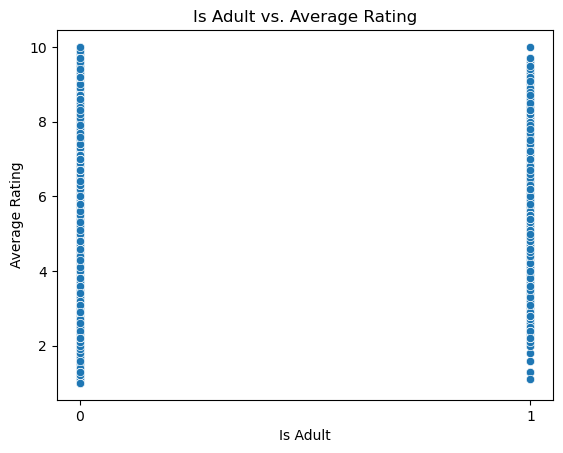

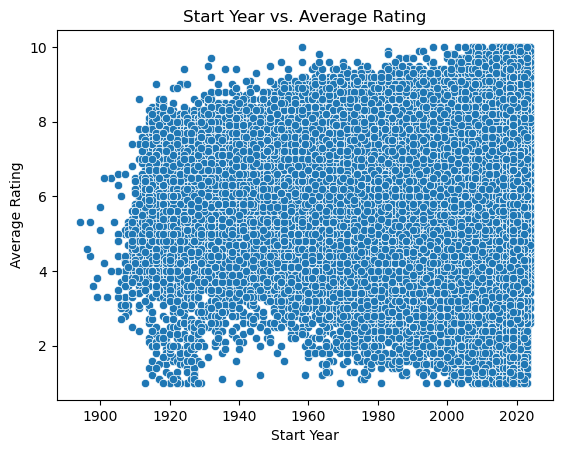

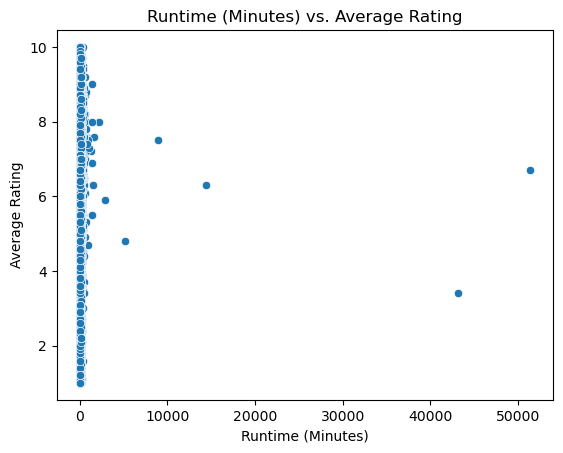

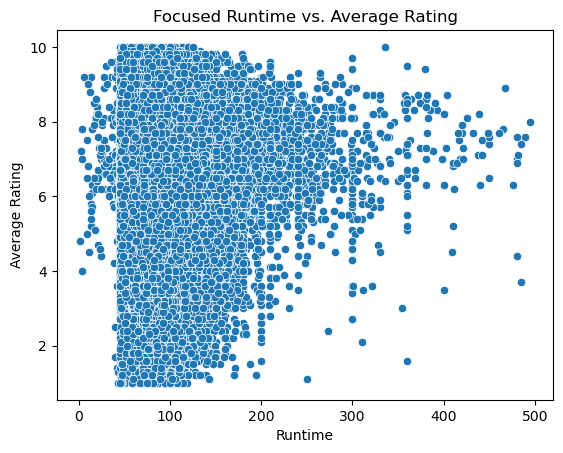

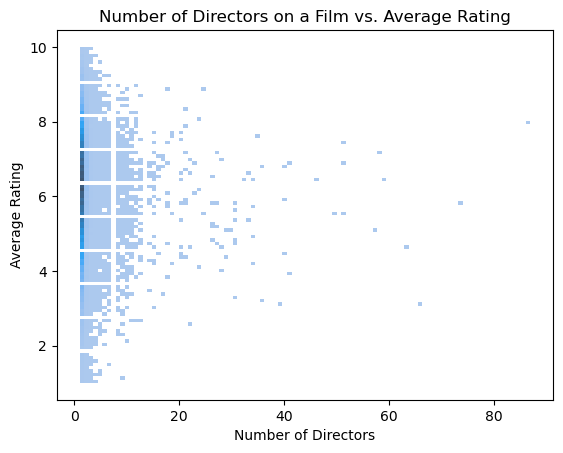

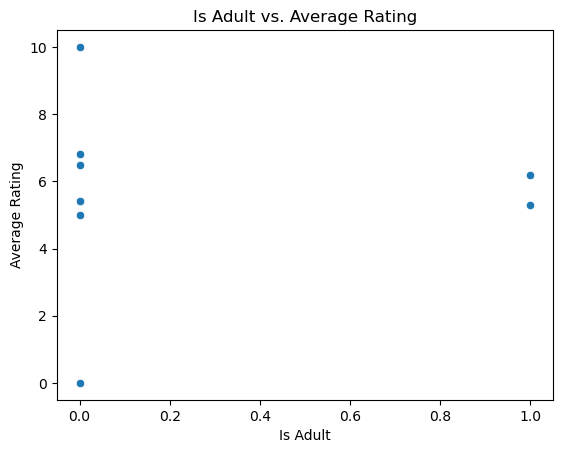

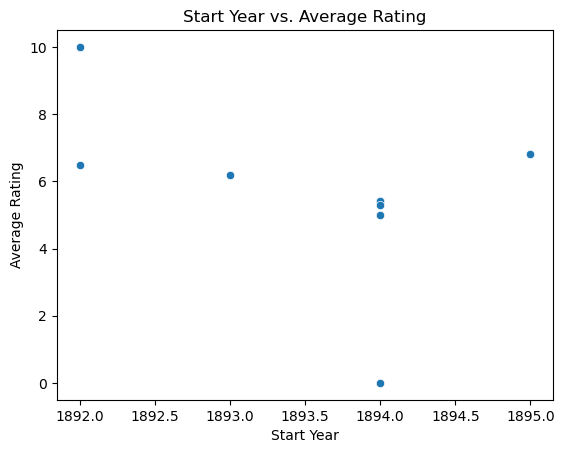

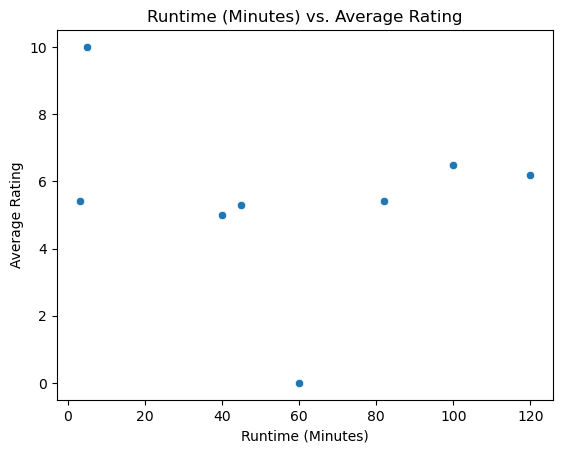

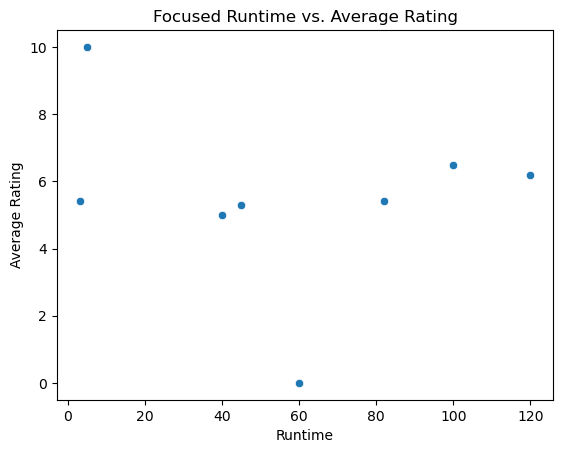

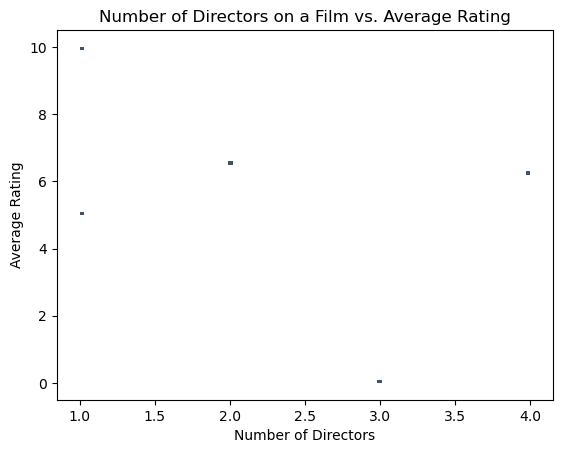

In [2]:
def merge_crew_movie(movies, crew):
    """
    Takes in movies data and crew data.
    Returns a new dataframe containing average rating and crew information.
    """
    ratings = movies[["tconst", "averageRating"]]
    crew_ratings = ratings.merge(crew, on="tconst")
    return crew_ratings

def plot_multiple(filter_data):
    """
    Takes in filtered movie data.
    Returns a scatterplot for each variable where the variable is on the x-axis and numVotes is on the y-axis.
    """
    variables = ["isAdult", "startYear", "runtimeMinutes"]
    titles = ["Is Adult", "Start Year", "Runtime (Minutes)"]


    # Plot each variable
    for variable, title in zip(variables, titles):
        plot = sns.scatterplot(filter_data, x=variable, y="averageRating")
        plot.set(title=title+" vs. Average Rating",
                xlabel=title,
                ylabel="Average Rating")
        plt.show()
        plt.clf

    double_filter = filter_data[filter_data["runtimeMinutes"] < 500]

    focus_runtime = sns.scatterplot(double_filter, x="runtimeMinutes", y="averageRating")
    focus_runtime.set(title="Focused Runtime vs. Average Rating",
                      xlabel="Runtime",
                      ylabel="Average Rating")
    plt.show()
    plt.clf
    return None


def plot_directors(crew):
    """
    Takes in dataframe with crew and rating information.
    Returns a histogram showing the number of directors on
        the x-axis and the average rating on the y-axis.
    """
    num_directors = []
    for row in crew["directors"]:
        length = len(list(row.split(",")))
        num_directors.append(length)
    crew["director_length"] = num_directors

    directors_plot = sns.histplot(crew, x="director_length", y="averageRating", bins=100)
    directors_plot.set(title="Number of Directors on a Film vs. Average Rating",
                    xlabel="Number of Directors",
                    ylabel="Average Rating")
    plt.show()
    plt.clf




# Real Data function Calls
plot_multiple(movie_rating_filter)
crew_ratings = merge_crew_movie(movie_rating_filter, crew_df)
plot_directors(crew_ratings)

# Test Data function calls
plot_multiple(test_filter)
crew_ratings_test = merge_crew_movie(test_filter, crew_test)
plot_directors(crew_ratings_test)

__Research Question 2:__ How does the genre of a movie affect its film rating?

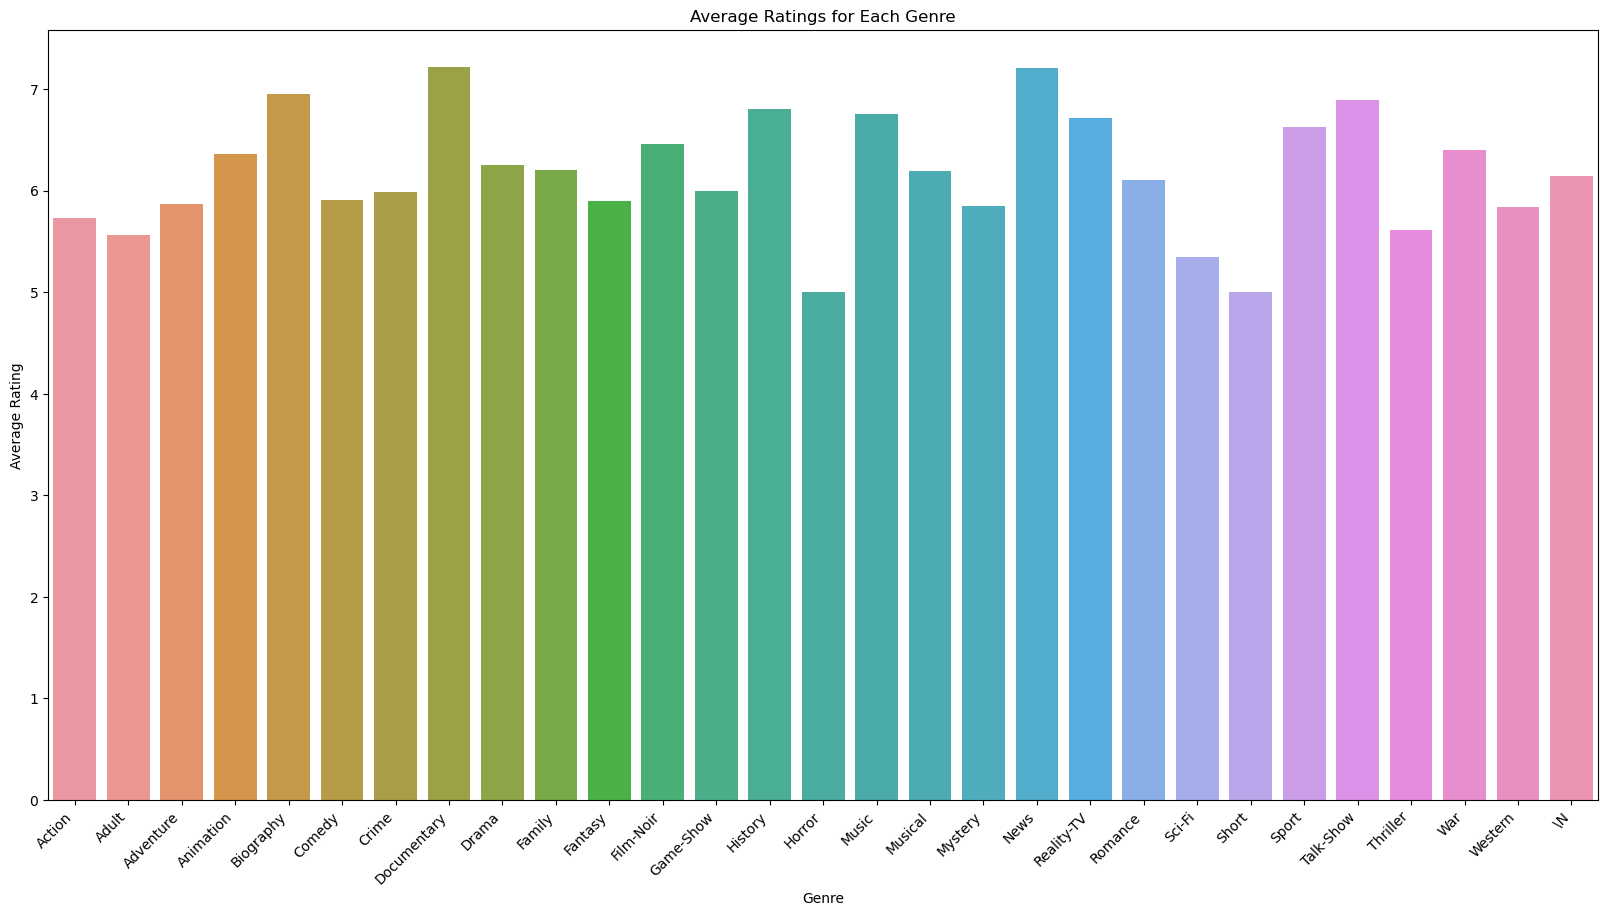

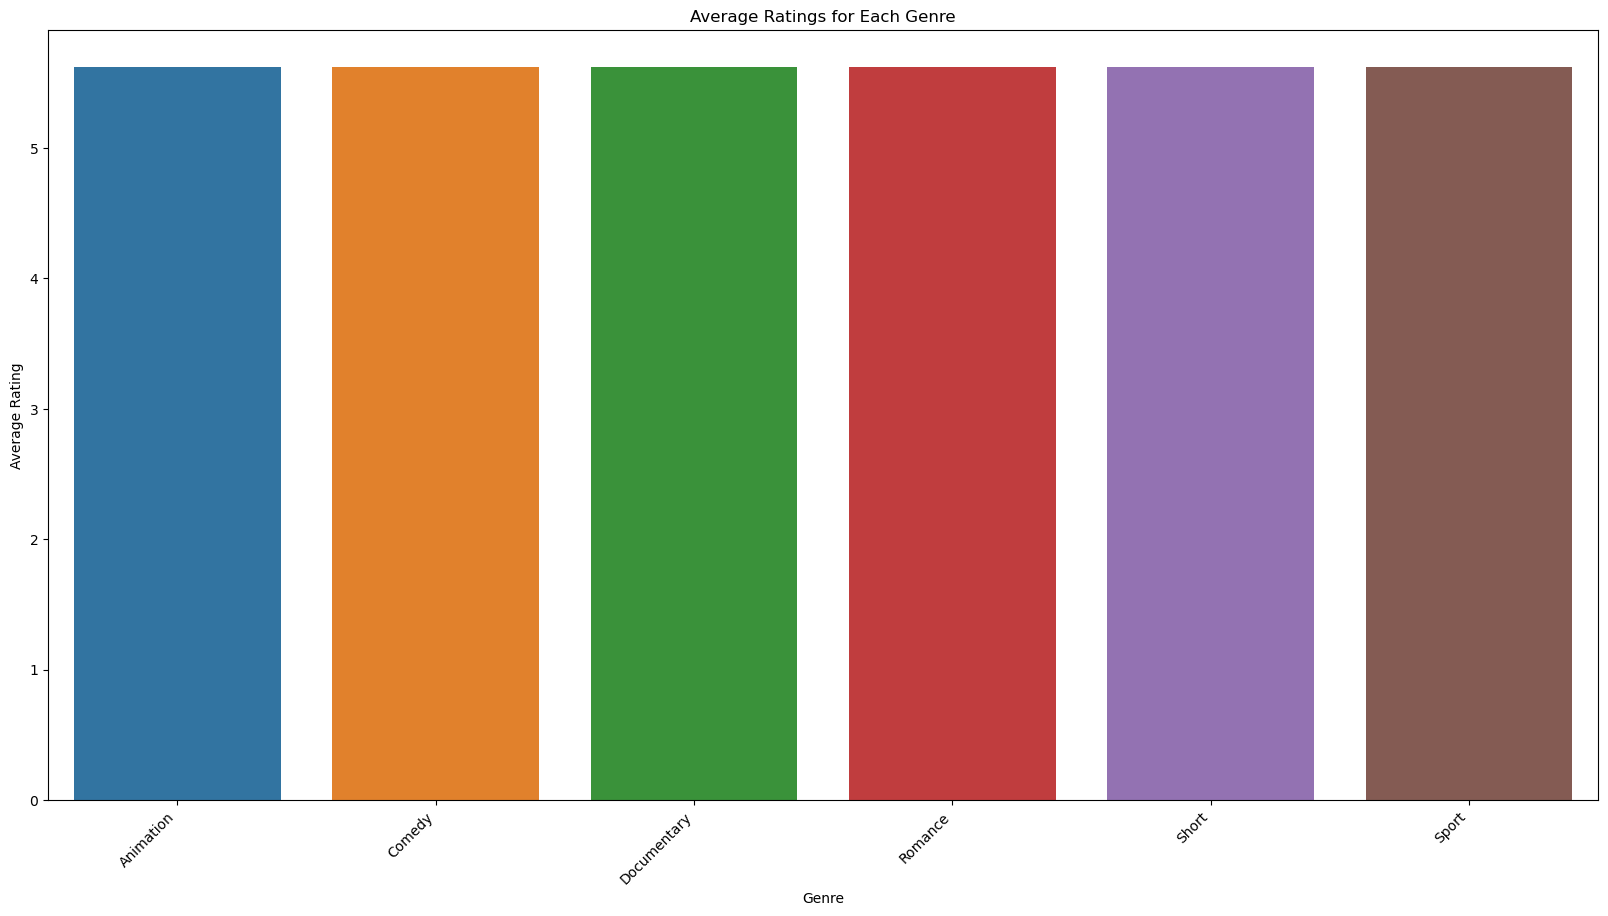

In [6]:
# Real data calls
genres_column = movie_rating_filter['genres']
tconst_column = movie_rating_filter['tconst']

genres_df = genres_column.str.get_dummies(sep=',').astype(bool)
genres_df['tconst'] = tconst_column

ratings_genre = genres_df.merge(ratings_df, on=("tconst"))
melted_genres = pd.melt(ratings_genre, id_vars=['tconst', 'averageRating', 'numVotes'], var_name='GenreValue')

# Test calls
genres_test_column = test_filter['genres']
tconst_test_column = test_filter['tconst'] 

genres_test = test_filter["genres"].str.get_dummies(sep=",").astype(int)
genres_test['tconst'] = tconst_test_column

# test_all_merged = test_filter.join(genres_test)
ratings_genre_test = genres_test.merge(ratings_test, on="tconst")
melted_genres_test = pd.melt(ratings_genre_test, id_vars=['tconst', 'averageRating', 'numVotes'], var_name='GenreValue')


# Filter out rows where genre is false
melted_genres = melted_genres[melted_genres['value']]
melted_genres = melted_genres.drop(columns='value')
melted_genres

def bar_plot(genre_avg_ratings, melted):
    """
    Plots each genre on the x-axis and average rating on the y-axis as a barplot.
    """
    genre_avg_ratings = melted.groupby('GenreValue')['averageRating'].mean().reset_index()

    plt.figure(figsize=(20, 10))
    sns.barplot(data=genre_avg_ratings, x='GenreValue', y='averageRating')

    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Genre')
    plt.ylabel('Average Rating')
    plt.title('Average Ratings for Each Genre')

    plt.show()
    plt.clf

bar_plot(movies_df, melted_genres)

# Function Calls for Test Data:
bar_plot(movies_test, melted_genres_test)

__Research Question 3:__ Does the number of votes a movie recieves affect the rating?

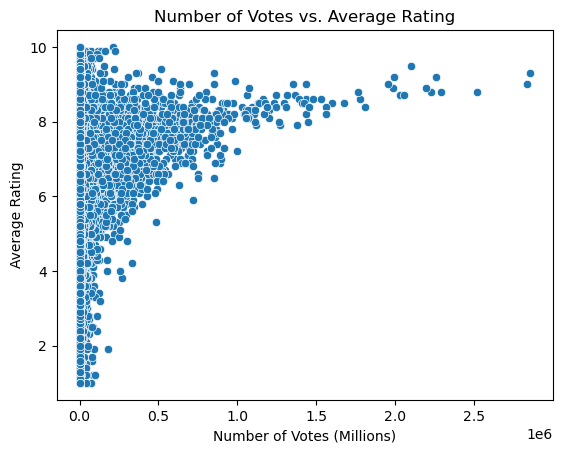

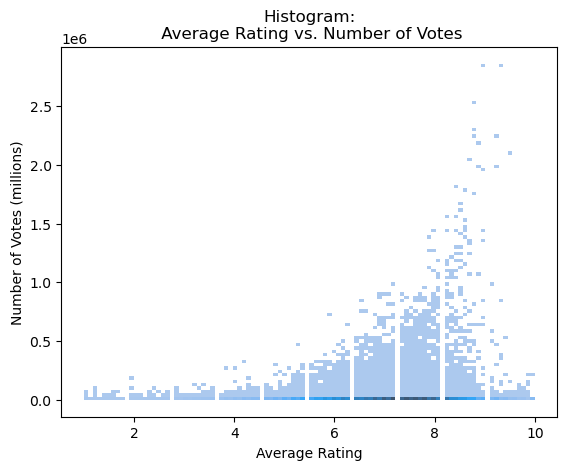

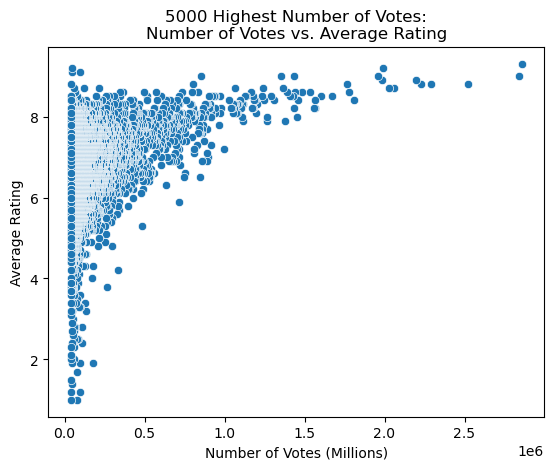

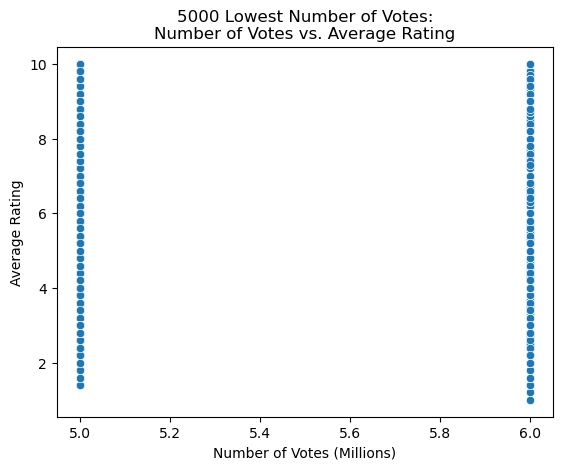

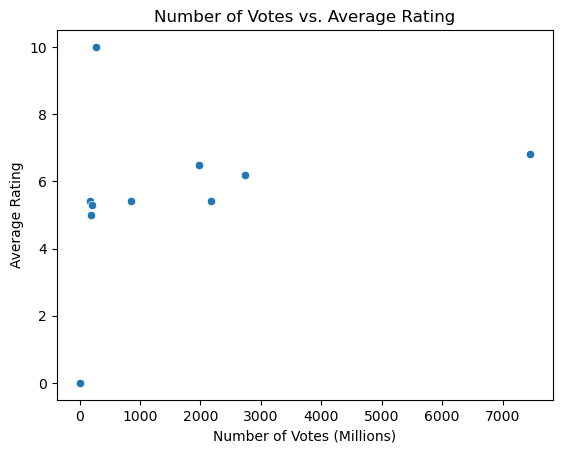

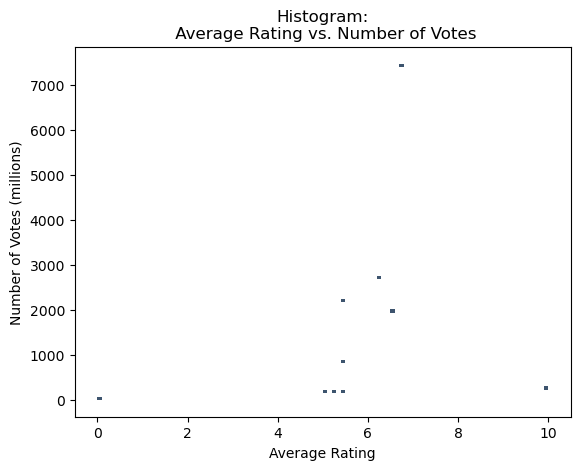

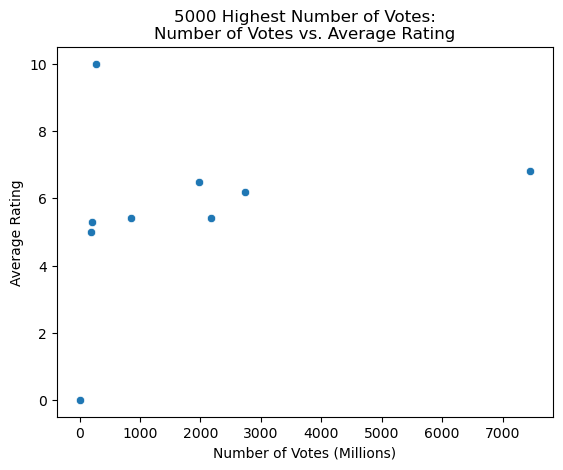

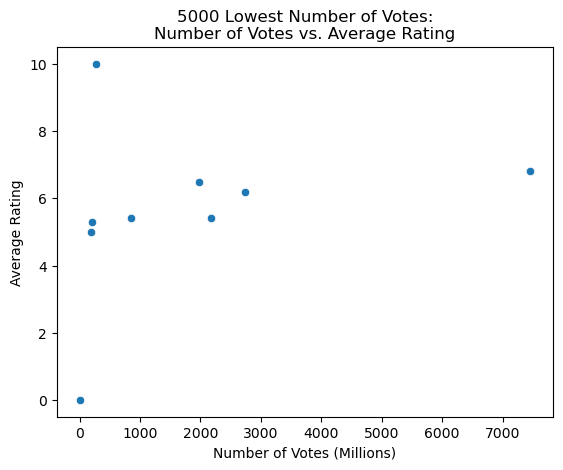

In [7]:
def scatter_plot(ratings):
    """
    Takes in ratings data.
    Returns a scatterplot of numVotes on the x-axis and averageRating on the y-axis
    """
    scatter = sns.scatterplot(ratings, x="numVotes", y="averageRating")
    scatter.set(title="Number of Votes vs. Average Rating",
             xlabel="Number of Votes (Millions)",
             ylabel="Average Rating")
    plt.show()
    # plt.savefig("votes_rating_scatter.png")
    plt.clf
    return scatter


def hist_plot(ratings):
    """
    Takes in ratings DataFrame.
    Plots a histogram with 100 bins, with averageRating on the x-axis and numVotes on the y-axis.
    """
    hist_plot = sns.histplot(ratings, x="averageRating", bins=100, y="numVotes")
    hist_plot.set(title="Histogram:\n Average Rating vs. Number of Votes",
                xlabel="Average Rating",
                ylabel="Number of Votes (millions)")
    plt.savefig("rating_votes_hist.png")
    plt.show()
    plt.clf
    return None


def top_bottom_5000(top_five, bottom_five):
    """
    Take in DataFrame subsetes where top_five represents the 5000 movies with the
        highest number of votes nad bottom_five represents the 5000  movies with
        the lowest number of votes.
    Sorts the DataFrame based on the numvotes in descending order.
    Plots the 5000 highest number of votes and the 5000 lowest number
        of votes as a scatterplot.
    """
    plt.clf
    top_plot = sns.scatterplot(top_five, x="numVotes", y="averageRating")
    top_plot.set(title="5000 Highest Number of Votes:\nNumber of Votes vs. Average Rating",
         xlabel="Number of Votes (Millions)",
         ylabel="Average Rating")
    plt.show()
    # plt.savefig("top_five.png")
    plt.clf

    bottom_plot = sns.scatterplot(bottom_five, x="numVotes", y="averageRating")
    bottom_plot.set(title="5000 Lowest Number of Votes:\nNumber of Votes vs. Average Rating",
                    xlabel="Number of Votes (Millions)",
                    ylabel="Average Rating")
    plt.show()
    plt.clf
    return None



# Function calls for real data
sort_data = movie_rating_filter.sort_values(by="numVotes", axis=0, ascending=False)
top_five = sort_data.head(5000)
bottom_five = sort_data.tail(5000)

scatter_plot(ratings_df)
hist_plot(ratings_df)
top_bottom_5000(top_five, bottom_five)


# Function calls for test data
sort_test = test_filter.sort_values(by="numVotes", axis=0, ascending=False)
top_five_test = sort_test.head(5000)
bottom_five_test = sort_test.tail(5000)

scatter_plot(ratings_test)
hist_plot(ratings_test)
top_bottom_5000(top_five_test, bottom_five_test)

Function Tests (test plots are written into each question individually)

In [8]:
# Test merge_movie_rating
assert set(test_merge.columns) == {'averageRating', 'runtimeMinutes', 'numVotes',
                                   'startYear', 'endYear', 'primaryTitle', 'originalTitle',
                                   'genres', 'titleType', 'isAdult', 'tconst'}
assert math.isclose(test_merge.loc[0, "numVotes"], 0) == True
assert math.isclose(test_merge.loc[0, "averageRating"], 0.0) == True
assert math.isclose(test_merge.loc[2, "averageRating"], 6.5) == True

# Test change_type
types = ["object", "object", "object", "object", "int64", "int64", "float64", "float64", "object", "float64", "int64"]
for type, expected in zip(test_merge.dtypes, types):
    assert type == expected

# Test test_filter
assert set(test_filter.loc[slice(None), "titleType"]) == {"movie"}
assert math.isclose(test_filter.loc[0, "numVotes"], 0) == True

# Test merge_crew_movie
assert list(crew_ratings_test.columns) == ["tconst", "averageRating", "directors", "writers", "director_length"]
assert crew_ratings_test.loc[0, "tconst"] == "tt0000001"
assert crew_ratings_test.loc[0, "directors"] == "nm0005690,nm0721526,nm0721526"
assert math.isclose(crew_ratings_test.loc[0, "averageRating"], 0.0)